🔄 Loading and Processing Data...
✅ Data Ready for Modeling

🚀 Training Models...
   --> Linear Regression Trained.
   --> Random Forest Trained.

🏆 Model Performance:


,MAE,RMSE,R2
Linear Regression,4177.045561,5956.342894,0.806929
Random Forest,2665.659797,4732.502123,0.878118


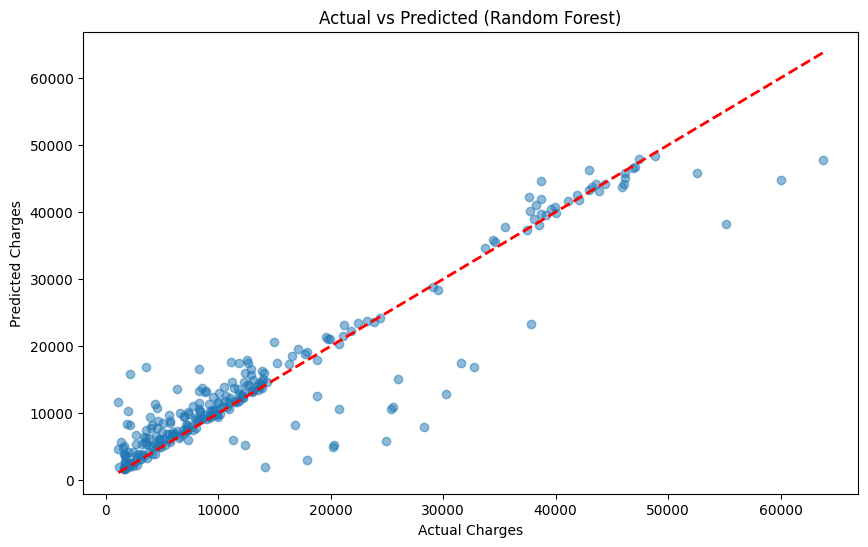

In [1]:
# 1. Imports
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add src to path to import our custom script
sys.path.append(os.path.abspath(os.path.join('..')))
from src.preprocessing import load_data, clean_data, split_data, get_preprocessor

# 2. Load & Process Data
print("🔄 Loading and Processing Data...")
df = load_data('../data/raw/insurance.csv')
df = clean_data(df)
X_train, X_test, y_train, y_test = split_data(df)

# Get the preprocessor we defined in src/preprocessing.py
preprocessor = get_preprocessor()

# Fit the preprocessor on training data and transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("✅ Data Ready for Modeling")

# 3. Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

print("\n🚀 Training Models...")
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    predictions = model.predict(X_test_processed)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"   --> {name} Trained.")

# 4. Compare Results
results_df = pd.DataFrame(results).T
print("\n🏆 Model Performance:")
display(results_df)

# 5. Visualizing the Best Model (Random Forest)
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test_processed)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()